In [12]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [13]:
data = pd.read_csv("filtro.csv")

In [14]:
profile = ProfileReport(data, title="Profiling Report")

In [15]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [21]:
titulos = str
for titulo in data["Abstract"]:
    titulos = titulo + " " + str(titulos)
titulos

"The study examined the nexus between the financial ratio and book value of shares for Iraqi money transfer companies. The data used was extracted from the financial reports of selected money transfer companies listed on the Iraq Stock Exchange, and a descriptive, correlation and panel least square regression technique were adopted for the analysis. The result revealed that the financial ratio captured by earnings per share (EPS), return on investment (ROI) and return on assets (ROA) were positively related with the book value of shares (BVAL), while debt ratio (DER) was negatively related with BVAL. Also, EPS, ROA, ROI and DER positively influenced BVAL. Thus, the engagement of competent and qualified personnel to manage the assets and investments in order to ensure optimal returns is urgently required. There is also a need for proper issuing of shares by the management of money transfer companies to ensure free access to the stock market. © The author(s) 2021 The paper reports three 

In [22]:
stop_words = stopwords.words('english')

In [23]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [24]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [25]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [26]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [27]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

freq
financial     14
money         14
board         11
value          9
analysis       7
proper         6
process        6
management     6
paper          6
three          6

In [28]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

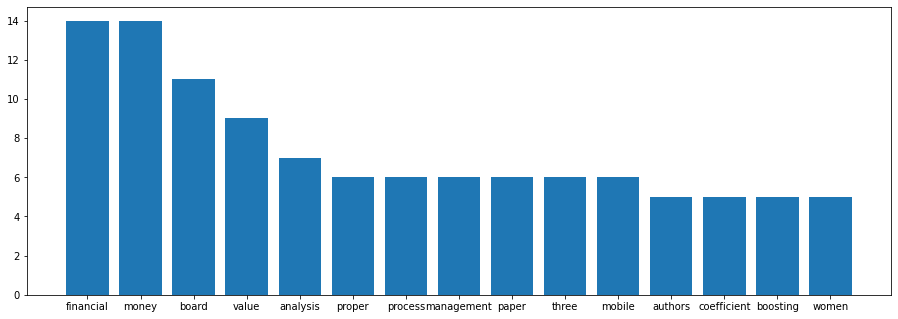

In [33]:
plot_bar(data=df, top=15)

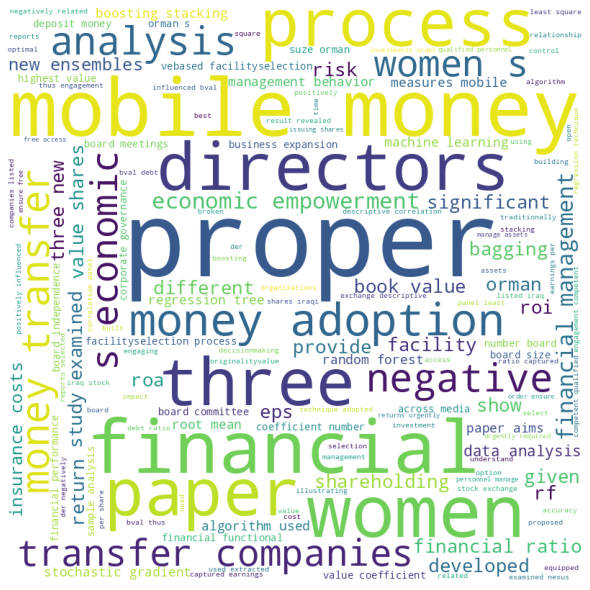

In [34]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud.to_file("n1.png") 
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
data.head()

Authors  \
0   Kafidipe A.; Uwalomwa U.; Dahunsi O.; Okeme F.O.   
1                                       Cormany D.L.   
2               Zhao C.; Yang E.; Nie Y.; Russo J.D.   
3                        Dorfleitner G.; Nguyen Q.A.   
4  Shakhovska N.; Melnykova N.; Chopiyak V.; Greg...   

                                   Author full names  \
0  Kafidipe, Abiola (57211781961); Uwalomwa, Uwui...   
1                    Cormany, Diane L. (56676312100)   
2  Zhao, Cencheng (57207951283); Yang, Eunhwa (57...   
3  Dorfleitner, Gregor (6602624940); Nguyen, Quyn...   
4  Shakhovska, Nataliya (42962320400); Melnykova,...   

                                        Author(s) ID  \
0  57211781961; 57222732505; 57211215855; 5722270...   
1                                        56676312100   
2  57207951283; 57208726729; 57207946145; 5720795...   
3                            6602624940; 57205121084   
4  42962320400; 55312617400; 57278703800; 6602734679   

                                              Titles  Year  \
0  Corporate governance, risk management and fina...  2021   
1  Love is an Emergency Savings Fund: Suze Orman’...  2020   
2  Facility decision making process with modified...  2019   
3  Mobile money for women’s economic empowerment:...  2022   
4  An ensemble methods for medical insurance cost...  2022   

                          Source title  Volume  Issue   Art. No.  Page start  \
0       Cogent Business and Management     8.0    1.0  1888679.0         NaN   
1  Communication, Culture and Critique    13.0    4.0        NaN       468.0   
2     Journal of Corporate Real Estate    21.0    2.0        NaN       112.0   
3         Review of Managerial Science     NaN    NaN        NaN         NaN   
4    Computers, Materials and Continua    70.0    2.0        NaN      3969.0   

   ...  Cited by                                               Link  \
0  ...         4  https://www.scopus.com/inward/record.uri?eid=2...   
1  ...         0  https://www.scopus.com/inward/record.uri?eid=2...   
2  ...         4  https://www.scopus.com/inward/record.uri?eid=2...   
3  ...         1  https://www.scopus.com/inward/record.uri?eid=2...   
4  ...         4  https://www.scopus.com/inward/record.uri?eid=2...   

                                            Abstract  \
0  This study examined corporate governance, risk...   
1  After retiring from The Suze Orman Show, Suze ...   
2  Purpose: This paper aims to provide organizati...   
3  This article examines whether mobile money ado...   
4  The paper reports three new ensembles of super...   

                                    Indexed Keywords  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Adaptive boosting; Cost benefit analysis; Data...   

                                     Author Keywords Document Type  \
0  Corporate governance indicator; financial perf...       Article   
1  Affect; Cruel Optimism; Financialization; Post...       Article   
2  Facility management; Facility selection; Finan...       Article   
3  62J05; 91B28; Financial management behavior; M...       Article   
4  Data analysis; Ensemble; Healthcare; Machine l...       Article   

  Publication Stage                                        Open Access  \
0             Final                  All Open Access; Gold Open Access   
1             Final                                                NaN   
2             Final                                                NaN   
3  Article in press  All Open Access; Green Open Access; Hybrid Gol...   
4             Final                  All Open Access; Gold Open Access   

   Source                 EID  
0  Scopus  2-s2.0-85103894123  
1  Scopus  2-s2.0-85142601691  
2  Scopus  2-s2.0-85063316411  
3  Scopus  2-s2.0-85133557640  
4  Scopus  2-s2.0-85116057605  

[5 rows x 23 columns